In [1]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tqdm import tqdm
from skimage.transform import pyramid_gaussian

In [2]:
path_to_data = "/home/swagget/OneDrive/masters/sem1/cv/project/DeepDeblur-PyTorch/selective_sharpening_data"

In [3]:
input_images = []
output_images = []
for file in sorted(os.listdir(path_to_data + "/input/")):
    image = cv.imread(path_to_data + "/input/" + file, )[:, :, ::-1]
#     gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    input_images.append(image)

for file in sorted(os.listdir(path_to_data + "/output/")):
    image = cv.imread(path_to_data + "/output/" + file, )[:, :, ::-1]
#     gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    output_images.append(image)

In [12]:
def greyfy(image):
    return cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [4]:
image = cv.imread(path_to_data + "/blur/" + "000047.png")
image = image[:, :, ::-1]  # BGR -> RGB
print("image.shape : ", image.shape)

image.shape :  (720, 1280, 3)


In [4]:
def display_imgs(images):
    if not isinstance(images, list):
        images = [images]
#     plt.figure(figsize=(len(images)*10,len(images)*10), dpi = 80)
#     figure(figsize=(18, 16), dpi=80)

    for img in images:
        plt.figure(figsize=(len(images)*10,len(images)*10), dpi = 80)
        plt.imshow(img)

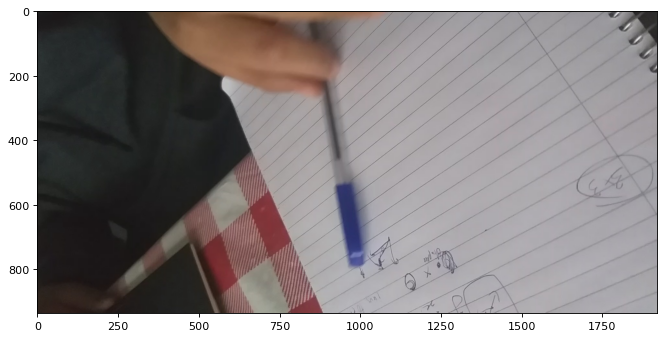

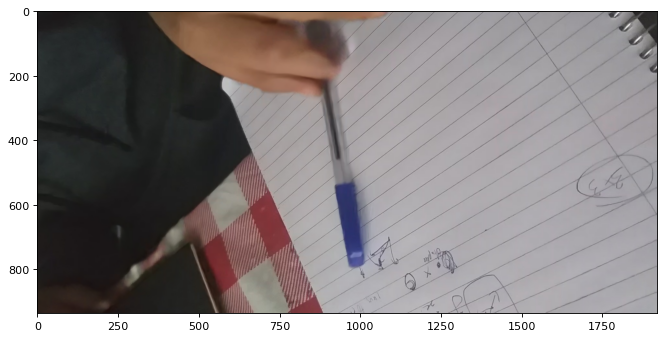

In [6]:
display_imgs(input_images[0])
display_imgs(output_images[0])

# Optical flow calculation

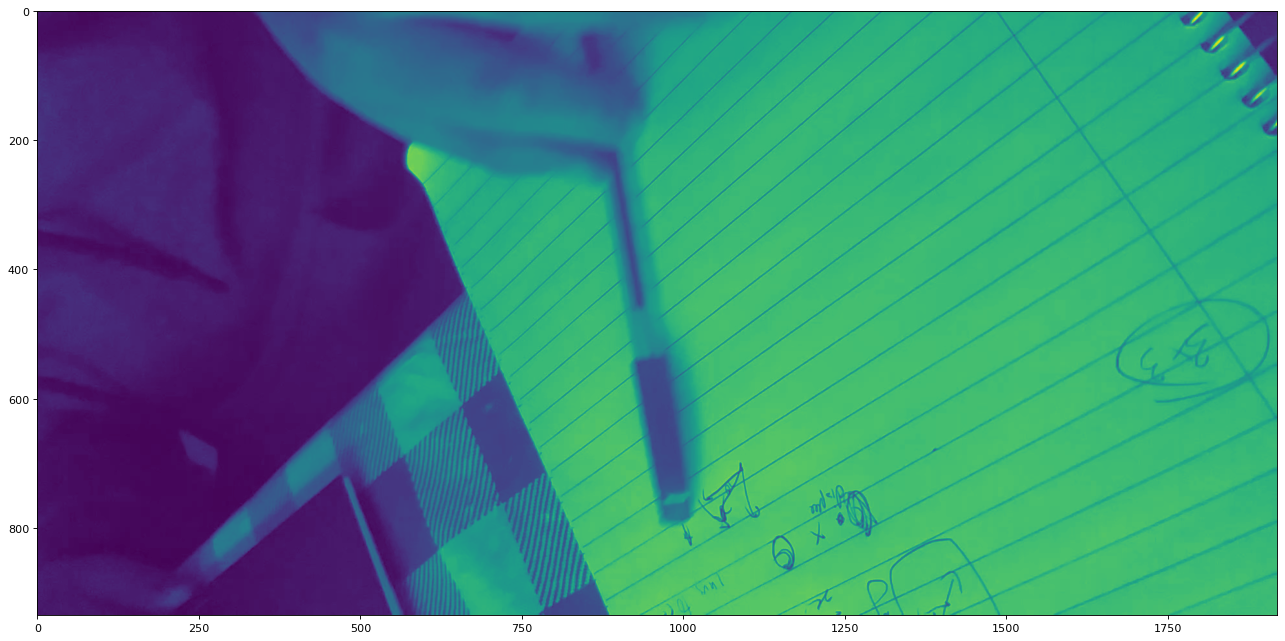

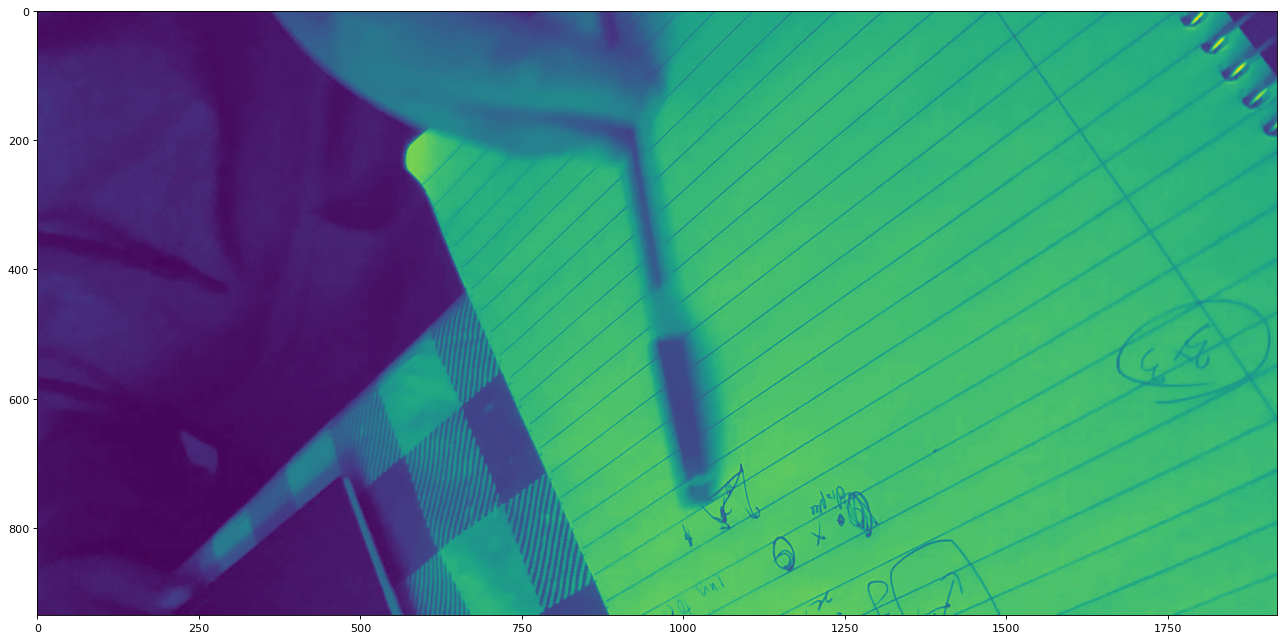

In [18]:
display_imgs([all_images[0], all_images[1]])

In [10]:
all_images[0].shape

(720, 1280)

In [13]:
flow_output = cv.calcOpticalFlowFarneback(greyfy(input_images[0]), greyfy(input_images[1]), None,
                                         pyr_scale=0.8, levels=15, winsize=5,
                                      iterations=10, poly_n=5, poly_sigma=0,
                                      flags=10)

In [17]:
flow_output.shape[:2]

(936, 1920)

In [20]:
def convert_optical_flow_to_flow_magnitudes(optical_flow):
    optical_flow_magnitude = np.zeros(optical_flow.shape[:2])
    for y in tqdm(range(optical_flow.shape[0])):
        for x in range(optical_flow.shape[1]):
            optical_flow_magnitude[y,x] = np.sqrt(optical_flow[y, x, 0]**2 + optical_flow[y, x, 1]**2)
    return optical_flow_magnitude

In [21]:

optical_flow_magnitude = convert_optical_flow_to_flow_magnitudes(flow_output)

100%|████████████████████████████████████████| 936/936 [00:08<00:00, 112.76it/s]


In [22]:
optical_flow_magnitude.shape

(936, 1920)

In [23]:
optical_flow_magnitude[0,0]

1.7008964942212668e-07

In [29]:
((5.75691068e-08)**2)+ ((-1.60050888e-07)**2)

2.893048880733835e-14

In [34]:
flow_output[0, 0, 0], flow_output[0, 0, 1]

(5.7569107e-08, -1.6005089e-07)

In [32]:
flow_output[0, 0, 0]**2 + flow_output[0, 0, 1]**2

2.8930488840541957e-14

In [25]:
flow_output

array([[[ 5.75691068e-08, -1.60050888e-07],
        [-5.46240280e-08, -2.08269014e-07],
        [-1.31429886e-07, -3.13914313e-07],
        ...,
        [-3.48977025e-08,  1.13147536e-07],
        [-2.89077633e-08,  2.06940527e-08],
        [-6.06269435e-09,  7.76114506e-10]],

       [[ 1.54688180e-07, -2.28697488e-07],
        [-6.57699957e-08, -2.24536308e-07],
        [-2.28994239e-07, -2.68001855e-07],
        ...,
        [-2.32185258e-07,  4.35042722e-07],
        [-2.54693390e-07,  8.94445193e-08],
        [-4.77497260e-08,  8.03179212e-09]],

       [[ 2.54632141e-07, -2.47758123e-07],
        [ 4.17684021e-08, -2.63503665e-07],
        [-1.57494952e-07, -1.68950351e-07],
        ...,
        [-1.38366408e-06,  1.05974749e-07],
        [-1.29604041e-06,  2.00128454e-07],
        [-3.34487851e-07,  5.55014346e-08]],

       ...,

       [[ 6.33087893e-07,  3.24321064e-07],
        [ 2.89370917e-07, -1.68852580e-06],
        [-2.71433237e-06, -3.94807876e-06],
        ...,
     

# Output

In [96]:
def see_thresholding_for_optical_flow(blurry_image, neural_network_output, optical_flow_magnitude, optical_flow_threshold):
    optical_flow_magnitude
    new_image_output = np.zeros(blurry_image.shape)
    for y in range(new_image_output.shape[0]):
        for x in range(new_image_output.shape[1]):
            if optical_flow_magnitude[y, x] > optical_flow_threshold:
                new_image_output[y, x] = [0.0, 255.0, 0.0]
            else:
                new_image_output[y, x] = blurry_image[y, x]
    return new_image_output

In [98]:
new_image_output

array([[[ 36.,  36.,  36.],
        [ 35.,  35.,  35.],
        [ 33.,  33.,  33.],
        ...,
        [ 44.,  44.,  42.],
        [ 44.,  44.,  42.],
        [ 44.,  44.,  42.]],

       [[ 36.,  36.,  36.],
        [ 35.,  35.,  35.],
        [ 33.,  33.,  33.],
        ...,
        [ 44.,  44.,  42.],
        [ 44.,  44.,  42.],
        [ 44.,  44.,  42.]],

       [[ 36.,  36.,  36.],
        [ 35.,  35.,  35.],
        [ 33.,  33.,  33.],
        ...,
        [ 44.,  44.,  42.],
        [ 44.,  44.,  42.],
        [ 44.,  44.,  42.]],

       ...,

       [[ 42.,  31.,  27.],
        [ 45.,  34.,  30.],
        [ 47.,  36.,  32.],
        ...,
        [170., 170., 172.],
        [170., 170., 172.],
        [170., 170., 172.]],

       [[ 42.,  31.,  27.],
        [ 44.,  33.,  29.],
        [ 46.,  35.,  31.],
        ...,
        [170., 170., 172.],
        [170., 170., 172.],
        [170., 170., 172.]],

       [[ 43.,  32.,  28.],
        [ 43.,  32.,  28.],
        [ 45.,  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


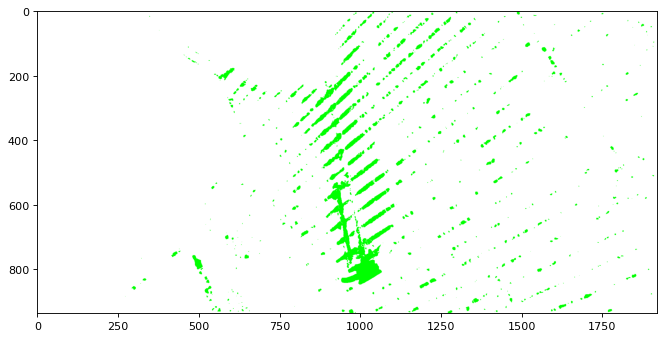

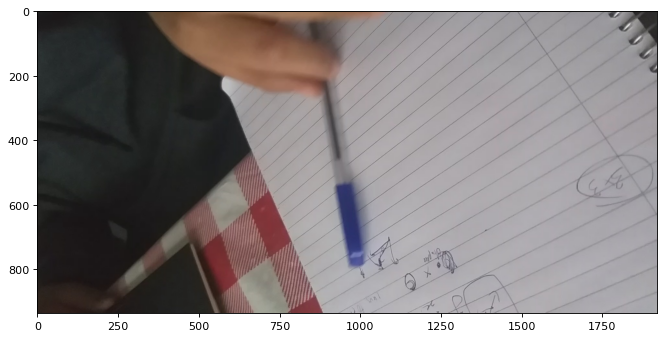

In [97]:
new_image_output = see_thresholding_for_optical_flow(input_images[0], output_images[0], 
                                   optical_flow_magnitude, optical_flow_threshold = 3)

plt.figure(figsize=(10,10), dpi = 80)
plt.imshow(new_image_output)
plt.figure(figsize=(10,10), dpi = 80)
plt.imshow(input_images[0])

# Clean frame

In [116]:
def cleaning_frames(blurry_image, neural_network_output, optical_flow_magnitude, optical_flow_threshold):
#     optical_flow_magnitude
    new_image_output = np.zeros(blurry_image.shape, dtype=int)
    pixels_crossing_threshold = 0
    for y in range(new_image_output.shape[0]):
        for x in range(new_image_output.shape[1]):
            if optical_flow_magnitude[y, x] > optical_flow_threshold:
                new_image_output[y, x, :] = neural_network_output[y, x, :]
#                 print("Trying to put in : ", neural_network_output[y, x, :], " instead of ", [0, 255, 0])
#                 raise
#                 new_image_output[y, x, :] = [0, 255, 0]
                pixels_crossing_threshold += 1
            else:
                new_image_output[y, x, :] = np.array(blurry_image[y, x, :])
    print("pixels_crossing_threshold : ", pixels_crossing_threshold)
    return new_image_output

pixels_crossing_threshold :  60070
output


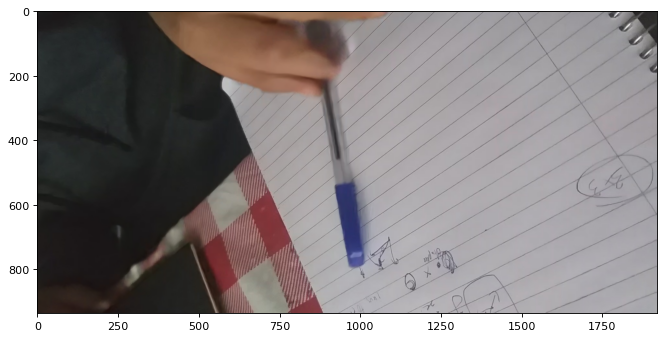

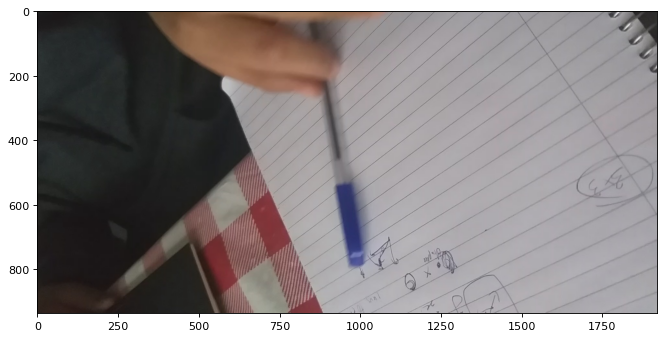

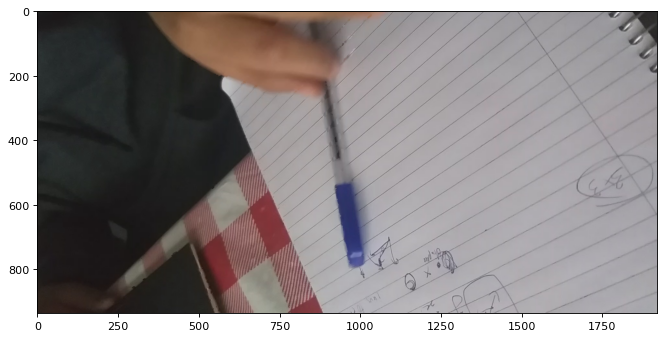

In [118]:
new_image_output = cleaning_frames(input_images[0], output_images[0], 
                                   optical_flow_magnitude, optical_flow_threshold = 3)

plt.figure(figsize=(10,10), dpi = 80)
plt.imshow(output_images[0]) 
plt.figure(figsize=(10,10), dpi = 80)
plt.imshow(input_images[0])

print("output")

plt.figure(figsize=(10,10), dpi = 80)
plt.imshow(new_image_output)

In [102]:
new_image_output.shape

(936, 1920, 3)

In [55]:
deblurred_image = apply_motion_blur_reduction_based_on_optical_flow(next_frame=all_images[1], 
                                                                    optical_flow=flow_output)

NameError: name 'apply_motion_blur_reduction_based_on_optical_flow' is not defined

In [80]:
for y in range(deblurred_image.shape[0]):
    for x in range(deblurred_image.shape[1]):
        if deblurred_image[y, x] == 255:
            print("y and x : ", y, x)

y and x :  52 1118
y and x :  52 1124
y and x :  52 1132
y and x :  52 1133
y and x :  53 1112
y and x :  53 1113
y and x :  53 1116
y and x :  53 1122
y and x :  53 1124
y and x :  53 1126
y and x :  53 1129
y and x :  53 1130
y and x :  53 1131
y and x :  53 1132
y and x :  53 1134
y and x :  53 1138
y and x :  53 1139
y and x :  53 1163
y and x :  53 1164
y and x :  53 1165
y and x :  54 1107
y and x :  54 1109
y and x :  54 1110
y and x :  54 1112
y and x :  54 1114
y and x :  54 1116
y and x :  54 1118
y and x :  54 1120
y and x :  54 1122
y and x :  54 1124
y and x :  54 1128
y and x :  54 1129
y and x :  54 1130
y and x :  54 1134
y and x :  54 1135
y and x :  54 1136
y and x :  54 1137
y and x :  54 1139
y and x :  54 1142
y and x :  54 1143
y and x :  54 1144
y and x :  54 1145
y and x :  54 1148
y and x :  54 1149
y and x :  54 1164
y and x :  54 1166
y and x :  54 1167
y and x :  54 1168
y and x :  54 1169
y and x :  54 1170
y and x :  54 1171
y and x :  54 1173
y and x :  5

In [81]:
flow_output[200,5]

array([-0.04547926,  0.03971346], dtype=float32)

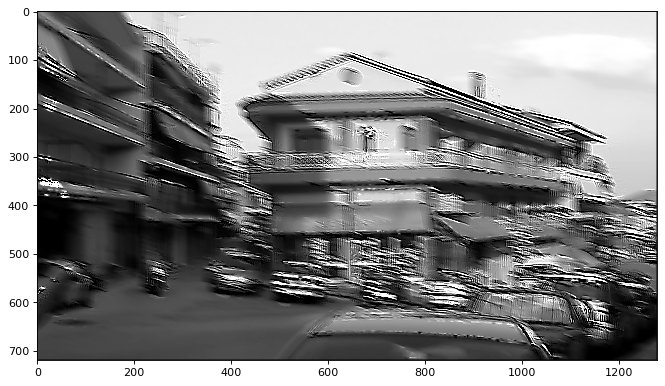

In [78]:
plt.figure(figsize=(10,10), dpi = 80)
plt.imshow(deblurred_image, cmap='gray', vmin=0, vmax=255.)

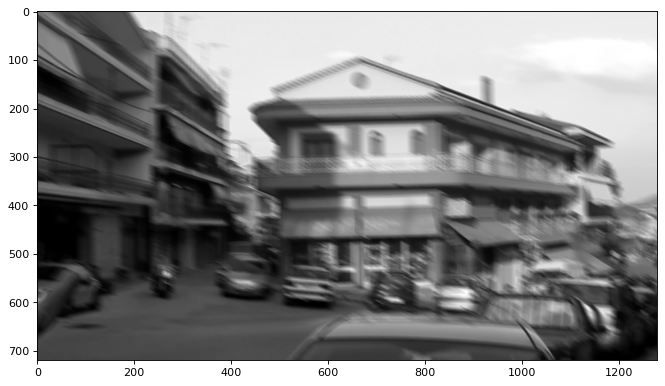

In [70]:
plt.figure(figsize=(10,10), dpi = 80)
plt.imshow(all_images[1], cmap='gray', vmin=0, vmax=255.)

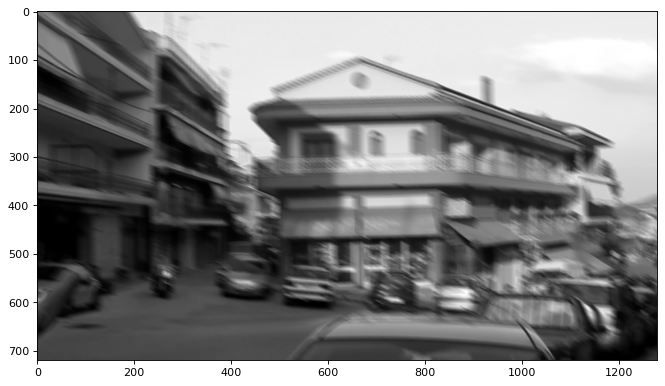

In [72]:
plt.figure(figsize=(10,10), dpi = 80)
plt.imshow(all_images[0], cmap='gray', vmin=0, vmax=255.)

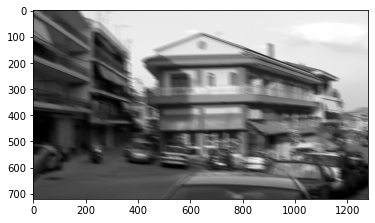

In [54]:
plt.imshow(all_images[1], cmap='gray', vmin=0, vmax=255.)

In [21]:
deblurred_image = np.zeros(next_frame.shape)
total_zeros = 0
neighbourhood_size = 1
for y in tqdm(range(neighbourhood_size, deblurred_image.shape[1] - neighbourhood_size)):
    for x in range(neighbourhood_size, deblurred_image.shape[1] - neighbourhood_size):
        next_frame = all_images[1]
        optical_flow=flow_output
        flow_pixel = optical_flow[y][x]
        generated_kernel = generate_identity_kernel(x_movement=flow_pixel[1], y_movement = flow_pixel[0])
        
        deblurred_image[y][x] = np.sum(next_frame[y-neighbourhood_size:y+1+neighbourhood_size, 
                                           x-neighbourhood_size:x+1+neighbourhood_size]*generated_kernel)
#         if np.sum(deblurred_image[y][x]) == 0:
#             total_zeros += 1
#             raise

 56%|█████████████████████▉                 | 718/1278 [00:04<00:03, 146.28it/s]


ValueError: operands could not be broadcast together with shapes (2,3) (3,3) 

In [23]:
next_frame.shape

(720, 1280)

In [22]:
x, y

(1, 719)

In [156]:

optical_flow=flow_output
flow_pixel = optical_flow[y][x]
generated_kernel = generate_kernel(x_movement=flow_pixel[1], y_movement = flow_pixel[1])

deblurred_image[y][x] = np.sum(next_frame[y-neighbourhood_size:y+1+neighbourhood_size, 
                                   x-neighbourhood_size:x+1+neighbourhood_size]*generated_kernel)

In [169]:
next_frame[y-neighbourhood_size:y+10+neighbourhood_size, 
                                   x-neighbourhood_size:x+10+neighbourhood_size]

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]],
      dtype=uint8)

In [163]:
next_frame

array([[125, 129, 133, ..., 234, 234, 234],
       [123, 126, 129, ..., 234, 234, 234],
       [116, 121, 125, ..., 234, 234, 234],
       ...,
       [ 65,  65,  65, ...,  55,  54,  54],
       [ 65,  65,  65, ...,  59,  58,  58],
       [ 64,  65,  65, ...,  62,  61,  60]], dtype=uint8)

In [153]:
x, y

(1, 396)

In [166]:
deblurred_image[300][400] = 255

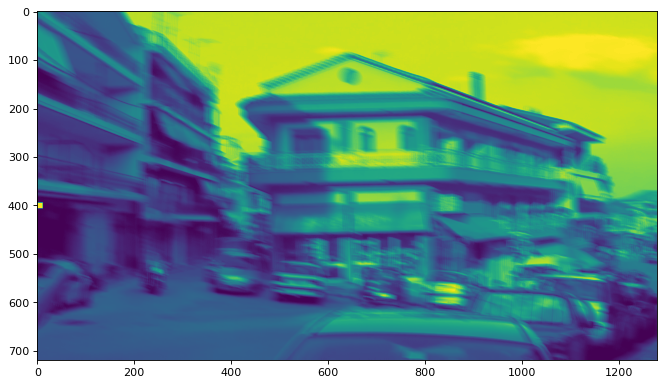

In [170]:
display_imgs(all_images[1])

In [133]:
deblurred_image

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 126.00052198, 128.99996209, ..., 234.        ,
        234.        ,   0.        ],
       [  0.        , 121.        , 125.00048412, ..., 234.        ,
        234.        ,   0.        ],
       ...,
       [  0.        ,  65.        ,  65.        , ...,  54.99997946,
         53.99997673,   0.        ],
       [  0.        ,  65.        ,  65.        , ...,  59.00000184,
         58.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

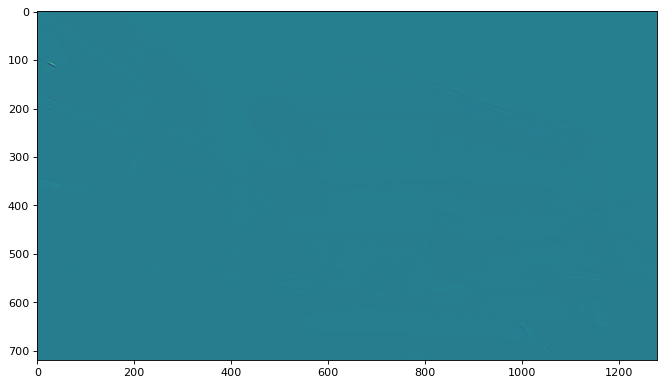

In [132]:
display_imgs(deblurred_image)

In [113]:
all_images[1].shape

(720, 1280)

In [111]:
flow_output.shape

(720, 1280, 2)